<a href="https://colab.research.google.com/github/kenkoech/AthleteProject/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
import cv2
from tensorflow. keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow. keras.models import Sequential
from tensorflow. keras.models import load_model
from tensorflow. keras.optimizers import Adam, SGD

<ipython-input-1-a582af57eb5d>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/class_photos')
data_iterator = Data.as_numpy_iterator()
batch = data_iterator.next()

Found 3736 files belonging to 7 classes.


In [10]:
#normalizing orparation
Data = Data.map(lambda x,y: (x/255, y))

#split the data set(75:15:10)
train_size = int(len(Data)*.75)
val_size = int(len(Data)*.15)
test_size = int(len(Data)*.1)

train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.15,
#     horizontal_flip=True
# )

model = Sequential([
base_model,
GlobalAveragePooling2D(),
Dense(258, activation='relu'),
Dense(256, activation='relu'),
Dense(8, activation='softmax')

])
opt = SGD(learning_rate=0.001, momentum = 0.9)
model.compile(optimizer=opt, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 258)            │       132,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        66,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,402 (56.90 MB)

 Trainable params: 14,915,402 (56.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import datetime
import tensorflow as tf

logdir = 'Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

total_epochs = 25
save_interval = 5

for epoch in range(0, total_epochs, save_interval):
    print("Training epochs " + str(epoch + 1) + " to " + str(epoch + save_interval) + "...")

    # Train in blocks of 10 epochs
    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save the model after every 10 epochs
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = "/content/drive/MyDrive/New Data/model_epoch" + str(epoch + save_interval) + "_" + date_stamp + ".h5"
    model.save(file_name)
    print("Model saved at epoch " + str(epoch + save_interval) + ": " + file_name)






Training epochs 1 to 5...
Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 756ms/step - accuracy: 0.8109 - loss: 0.5477 - val_accuracy: 0.6728 - val_loss: 0.9569
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 748ms/step - accuracy: 0.8321 - loss: 0.4906 - val_accuracy: 0.6636 - val_loss: 1.1035
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 744ms/step - accuracy: 0.8701 - loss: 0.3714 - val_accuracy: 0.6691 - val_loss: 1.1063
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 742ms/step - accuracy: 0.8696 - loss: 0.3904 - val_accuracy: 0.6507 - val_loss: 1.1398
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 742ms/step - accuracy: 0.9003 - loss: 0.3218 - val_accuracy: 0.7188 - val_loss: 1.0216


Model saved at epoch 5: /content/drive/MyDrive/New Data/model_epoch5_2025-04-14_01-54-22.h5
Training epochs 6 to 10...
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 741ms/step - accuracy: 0.9164 - loss: 0.2543 - val_accuracy: 0.6765 - val_loss: 1.2205
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 742ms/step - accuracy: 0.8915 - loss: 0.3430 - val_accuracy: 0.7188 - val_loss: 0.9931
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 743ms/step - accuracy: 0.9278 - loss: 0.2141 - val_accuracy: 0.6820 - val_loss: 1.1198
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 740ms/step - accuracy: 0.9366 - loss: 0.1939 - val_accuracy: 0.7040 - val_loss: 1.0548
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 744ms/step - accuracy: 0.9460 - loss: 0.1925 - val_accuracy: 0.6912 - val_loss: 1.2774


Model saved at epoch 10: /content/drive/MyDrive/New Data/model_epoch10_2025-04-14_02-00-03.h5
Training epochs 11 to 15...
Epoch 11/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 754ms/step - accuracy: 0.9600 - loss: 0.1491 - val_accuracy: 0.7261 - val_loss: 1.1586
Epoch 12/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 747ms/step - accuracy: 0.9560 - loss: 0.1414 - val_accuracy: 0.6801 - val_loss: 1.3002
Epoch 13/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 760ms/step - accuracy: 0.9567 - loss: 0.1254 - val_accuracy: 0.7482 - val_loss: 1.1410
Epoch 14/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 757ms/step - accuracy: 0.9733 - loss: 0.1073 - val_accuracy: 0.7316 - val_loss: 1.2716
Epoch 15/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 753ms/step - accuracy: 0.9710 - loss: 0.1011 - val_accuracy: 0.7188 - val_loss: 1.2056


Model saved at epoch 15: /content/drive/MyDrive/New Data/model_epoch15_2025-04-14_02-05-31.h5
Training epochs 16 to 20...
Epoch 16/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 746ms/step - accuracy: 0.9651 - loss: 0.1375 - val_accuracy: 0.7555 - val_loss: 1.1464
Epoch 17/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 746ms/step - accuracy: 0.9722 - loss: 0.0921 - val_accuracy: 0.7463 - val_loss: 1.1296
Epoch 18/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 743ms/step - accuracy: 0.9762 - loss: 0.0849 - val_accuracy: 0.7243 - val_loss: 1.2447
Epoch 19/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 74s 858ms/step - accuracy: 0.9848 - loss: 0.0592 - val_accuracy: 0.7592 - val_loss: 1.3367
Epoch 20/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 756ms/step - accuracy: 0.9832 - loss: 0.0601 - val_accuracy: 0.7445 - val_loss: 1.3688


Model saved at epoch 20: /content/drive/MyDrive/New Data/model_epoch20_2025-04-14_02-11-22.h5
Training epochs 21 to 25...
Epoch 21/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 748ms/step - accuracy: 0.9720 - loss: 0.0849 - val_accuracy: 0.7665 - val_loss: 1.2111
Epoch 22/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 743ms/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.7776 - val_loss: 1.0871
Epoch 23/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 741ms/step - accuracy: 0.9785 - loss: 0.0687 - val_accuracy: 0.7739 - val_loss: 1.2200
Epoch 24/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 744ms/step - accuracy: 0.9855 - loss: 0.0490 - val_accuracy: 0.7812 - val_loss: 1.1662
Epoch 25/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 742ms/step - accuracy: 0.9854 - loss: 0.0415 - val_accuracy: 0.7482 - val_loss: 1.3157


Model saved at epoch 25: /content/drive/MyDrive/New Data/model_epoch25_2025-04-14_02-16-46.h5


In [ ]:
new_model = load_model('/content/drive/MyDrive/New Data/model_epoch25_2025-04-14_02-16-46.h5')

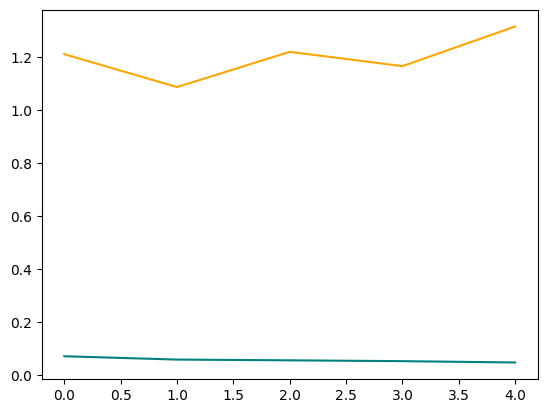

In [ ]:
#Plotting loss
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

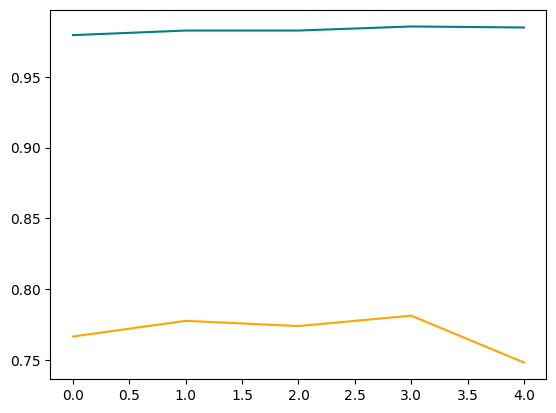

In [ ]:
# prompt: # plot accuracy for trained model

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()  # Use CategoricalAccuracy for multi-class

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = new_model.predict(X)

    # Convert y to one-hot encoding for CategoricalAccuracy
    y = tf.keras.utils.to_categorical(y, num_classes=8)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Precision: 0.6880734
Recall: 0.63920456
Accuracy: 0.6448864


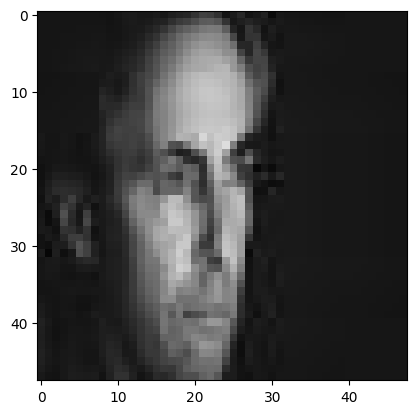

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.1755699e-02 3.2303942e-05 1.7809242e-04 5.7618339e-03 1.1631999e-03
  1.5536498e-03 9.6703523e-01 2.5200276e-03]]
Sadness


In [ ]:
#testing pipeline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
test_img = cv2.imread('/content/drive/MyDrive/AI Project Data/sadness/621462.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (256,256))
test_img = test_img/255.0
test_img = np.expand_dims(test_img, 0)
test_predicton = model.predict(test_img)

print(test_predicton)
if np.argmax(test_predicton) == 0:
  print('Anger')
elif np.argmax(test_predicton) == 1:
  print('Contempt')
elif np.argmax(test_predicton) == 2:
  print('Disgust')
elif np.argmax(test_predicton) == 3:
  print('Fear')
elif np.argmax(test_predicton) == 4:
  print('Happy')
elif np.argmax(test_predicton) == 5:
  print('Neutral')
elif np.argmax(test_predicton) == 6:
  print('Sadness')
elif np.argmax(test_predicton) == 7:
  print('Surprise')